<a href="https://colab.research.google.com/github/punramon/Data-Warehouse-and-Big-Data-Analytics-/blob/main/Text_Analytics_%E0%B8%AD%E0%B8%A2%E0%B8%B2%E0%B8%81%E0%B9%80%E0%B8%9B%E0%B9%87%E0%B8%99%E0%B8%99%E0%B8%B1%E0%B8%81%E0%B9%80%E0%B8%81%E0%B9%87%E0%B8%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 1: Text Analytics

<img src="https://www.datanami.com/wp-content/uploads/2014/06/text-analytics.png" width="500" />

ชื่อกลุ่ม: อยากเป็นนักเก็ต   

รายชื่อสมาชิก การแบ่งงาน และสัดส่วนในการทำงาน:
1. น.ส.พรรณรมณ ราชคมน์ 653020213-2 Problem1 Problem3
2. น.ส.สิริญาพร รสจันทร์ 653020218-2 Problem1 Problem2
3. น.ส.อริสรา ยังอยู่ 653020606-3 Problem2 Slide


กำหนดส่ง: พุธ 18 กันยายน 2567 \
รายงานในชั้นเรียน: พฤหัสบดี 19 กันยายน 2567

**ผลที่คาดหวังจากการทำงานนี้**
* สามารถใช้ Python ในการอ่านข้อมูล
* จัดการกับข้อมูลเบื้องต้นในรูปแบบข้อความก่อนนำไปวิเคราะห์
* สามารถวิเคราะห์ข้อมูลตัวอักษรเบื้องต้นและสร้าง Data Visualization ที่เหมาะสมได้
----------------------

In [ ]:
"""
หากไม่สามารถลง library ใด ให้ดาวน์โหลดดังตัวอย่างต่อไปนี้
!pip3 install numpy
!pip install nltk
!pip3 install wordcloud
"""
# Load these libraries
import json
import pprint
import pandas as pd
import numpy as np
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import urllib.request

import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1: Working with Twitter Data and JSON file
จากข้อมูลทวิตเตอร์เกี่ยวกับประเทศไทยที่เก็บในวันที่ 31 สิงหาคม 2565 ในรูปแบบ JSON จาก `thailand_tweets.txt` ซึ่งมีการดึงข้อมูลมาด้วยคีเวิร์ด "Thailand" ให้ทำการศึกษาข้อมูลและดึงค่าจากข้อมูล \
ทั้งนี้เราสามารถเรียกหน้าทวีตจาก tweet ID ได้ดังนี้
```
twitter.com/anyuser/status/<tweet_id>
```
หมายเหตุ: ไม่ต้องนำเสนอข้อนี้

#### Read JSON file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# You likely have a module named open in your environment. To verify, execute:
!pip list | grep open

# If this is the case, avoid naming modules "open"
path = '/content/drive/MyDrive/textdata/thailand_tweets.txt' # this assignment is fine
file = open(path,'r') # this should work now
foo = file.read()
data = json.loads(foo)

intel-openmp                     2024.2.1
opencv-contrib-python            4.10.0.84
opencv-python                    4.10.0.84
opencv-python-headless           4.10.0.84
openpyxl                         3.1.5
smart-open                       7.0.4


In [ ]:
data

'{"1564764893038882816": {"tweet_id": "1564764893038882816", "username": "matthunter", "name": "MATT HUNT\\u039eR", "profile_picture": "https://twitter.com/matthunter/photo", "replies": 2, "retweets": 1, "likes": 7, "is_retweet": false, "posted_time": "2022-08-30T23:59:57+00:00", "content": "Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ", "hashtags": [], "mentions": [], "images": [], "videos": [], "tweet_url": "https://twitter.com/matthunter/status/1564764893038882816", "link": ""}, "1564764866598080513": {"tweet_id": "1564764866598080513", "username": "DavSmithVP", "name": "DavSmith / Virtual Photography", "profile_picture": "https://twitter.com/DavSmithVP/photo", "replies": 0, "retweets": 0, "likes": 2, "is_retweet": false, "posted_time": "2022-08-30T23:59:50+00:00", "content": "Tomb Raider Underworld | Thailand \\n#VirtualPhotography \\n@tombraider\\n @crystaldynamics", "hashtags": ["VirtualPhotography"], "mentions": ["tombraider"

In [ ]:
tweet = json.loads(data)
tweet

{'1564764893038882816': {'tweet_id': '1564764893038882816',
  'username': 'matthunter',
  'name': 'MATT HUNTΞR',
  'profile_picture': 'https://twitter.com/matthunter/photo',
  'replies': 2,
  'retweets': 1,
  'likes': 7,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:59:57+00:00',
  'content': 'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ',
  'hashtags': [],
  'mentions': [],
  'images': [],
  'videos': [],
  'tweet_url': 'https://twitter.com/matthunter/status/1564764893038882816',
  'link': ''},
 '1564764866598080513': {'tweet_id': '1564764866598080513',
  'username': 'DavSmithVP',
  'name': 'DavSmith / Virtual Photography',
  'profile_picture': 'https://twitter.com/DavSmithVP/photo',
  'replies': 0,
  'retweets': 0,
  'likes': 2,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:59:50+00:00',
  'content': 'Tomb Raider Underworld | Thailand \n#VirtualPhotography \n@tombraider\n @crystaldynamics',
  'hashtags': ['Virtua

#### Inspect data in JSON format (either reading using pretty print or Pandas data frame)

In [ ]:
pprint.pprint(tweet)

{'1564761905410875392': {'content': 'Tinggal cari duitnya aja ini mah kalo di '
                                    'Thailand bisa pake Qris',
                         'hashtags': [],
                         'images': [],
                         'is_retweet': False,
                         'likes': 0,
                         'link': '',
                         'mentions': [],
                         'name': '',
                         'posted_time': '2022-08-30T23:48:04+00:00',
                         'profile_picture': 'https://twitter.com/moanfIeur/photo',
                         'replies': 0,
                         'retweets': 0,
                         'tweet_id': '1564761905410875392',
                         'tweet_url': 'https://twitter.com/moanfIeur/status/1564761905410875392',
                         'username': 'moanfIeur',
                         'videos': []},
 '1564761944061382656': {'content': 'Padahal berharap pertama lawan Thailand '
                     

In [ ]:
tweet_df = pd.read_json(StringIO(data), orient='index')

In [ ]:
tweet_df

,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url,link
2019-08-02 16:54:53.038882816,1564764893038882816,matthunter,MATT HUNTΞR,https://twitter.com/matthunter/photo,2,1,7,False,2022-08-30 23:59:57+00:00,"Thanks for asking! Yes, we will support shippi...",[],[],[],[],https://twitter.com/matthunter/status/15647648...,
2019-08-02 16:54:26.598080513,1564764866598080512,DavSmithVP,DavSmith / Virtual Photography,https://twitter.com/DavSmithVP/photo,0,0,2,False,2022-08-30 23:59:50+00:00,Tomb Raider Underworld | Thailand \n#VirtualPh...,[VirtualPhotography],"[tombraider, crystaldynamics]",[https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?f...,[],https://twitter.com/DavSmithVP/status/15647648...,
2019-08-02 16:54:05.685280772,1564764845685280768,DailyPattaya,The Pattaya Daily,https://twitter.com/DailyPattaya/photo,0,0,0,False,2022-08-30 23:59:45+00:00,The latest The Pattaya Daily! http://thepattay...,"[thailand, pattaya]","[PopeKael, ASEANNOWTH]",[],[],https://twitter.com/DailyPattaya/status/156476...,
2019-08-02 16:51:50.804897792,1564764710804897792,Bryan62766077,Bryan,https://twitter.com/Bryan62766077/photo,1,0,1,False,2022-08-30 23:59:13+00:00,"You can live some places for next to nothing, ...",[],[],[],[],https://twitter.com/Bryan62766077/status/15647...,
2019-08-02 16:47:48.277612549,1564764468277612544,Megan_and_Grrr,Megan,https://twitter.com/Megan_and_Grrr/photo,0,0,0,False,2022-08-30 23:58:15+00:00,"ALIEN HOUSE is a story of love, hope and alien...","[fantasy, extraterrestrial]",[],[https://pbs.twimg.com/media/Fbco_bSXEAMcDOZ?f...,[],https://twitter.com/Megan_and_Grrr/status/1564...,
2019-08-02 16:47:25.825458181,1564764445825458176,OhmPawatInter,OhmPawat International,https://twitter.com/OhmPawatInter/photo,0,99,143,False,2022-08-30 23:58:10+00:00,Trend twitter update \n\nTop Twitter influence...,"[4, ohmpawat, ย]",[ohmpawatt],[https://pbs.twimg.com/media/Fbco99jWIAEd3Oe?f...,[],https://twitter.com/OhmPawatInter/status/15647...,
2019-08-02 16:46:01.742110720,1564764361742110720,nato_tonyo11,nutri(BUSY SI ENGR.)| SoliD,https://twitter.com/nato_tonyo11/photo,0,2,18,False,2022-08-30 23:57:50+00:00,Good morning world! And goodmorning to you to...,[DonnyPangilinan],[],[],[],https://twitter.com/nato_tonyo11/status/156476...,
2019-08-02 16:44:34.098323456,1564764274098323456,ThThitikarn61,thiti,https://twitter.com/ThThitikarn61/photo,0,0,0,False,2022-08-30 23:57:29+00:00,Listening to #faraway the title track of #theo...,"[faraway, theotherside, MarkTuan]",[marktuan],[],[],https://twitter.com/ThThitikarn61/status/15647...,
2019-08-02 16:40:28.014313472,1564764028014313472,Livetradingnews,Knightly News,https://twitter.com/Livetradingnews/photo,0,2,3,False,2022-08-30 23:56:30+00:00,With the recent news of the SCB X-Bitkub deal ...,[],[],[],[],https://twitter.com/Livetradingnews/status/156...,
2019-08-02 16:38:27.700531202,1564763907700531200,DiscoverSoc,Discover Society,https://twitter.com/DiscoverSoc/photo,0,1,0,False,2022-08-30 23:56:02+00:00,#ICYMI On the Frontline. Crude Power in Thail...,[ICYMI],[],[],[],https://twitter.com/DiscoverSoc/status/1564763...,https://t.co/OYQzv4BSm9


In [ ]:
contents = " ".join([tweet[key]['content'] for key in tweet.keys()])
print(contents)

Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand.  Tomb Raider Underworld | Thailand 
#VirtualPhotography 
@tombraider
 @crystaldynamics The latest The Pattaya Daily! http://thepattayadaily.com Thanks to 
@PopeKael
 @ASEANNOWTH
 #thailand #pattaya You can live some places for next to nothing, believe it or not. I pay $300 a month for a really nice apartment in Thailand. All utilities included. No deposit. Close to the beach. Live music clubs everywhere. Meals are about $2 ALIEN HOUSE is a story of love, hope and alien intervention set in Wales, Thailand and Inner Space. It's a #fantasy story about #extraterrestrial contact and the conflict between a man and his inner voice or alter ego. William is not sure if he's going mad https://smarturl.it/alien-house-eng?IQid=jbmegan… Trend twitter update 

Top Twitter influencers in Thailand today 
#4 
@ohmpawatt
Influence Score: 19442
7 top tweets
25182 retweets

https://etrenders.com/trendsetters/

#### Report: จงตอบคำถามต่อไปนี้
* The total number of tweets collected in the file:
* The content of the first tweet:
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data:
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts  
* Display the top 5 tweets that are the most popular among your collection \
สามารถใช้ `np.argsort(<list>)[:5]` ซึ่งจะแสดงผล indices ของการเรียงค่าจากน้อยสุดไปมากสุด จำนวน 5 ค่า และ `np.argsort(<list>)[::-1][:5]` จะแสดงผล indices ของการเรียงค่าจากมากไปน้อยจำนวน 5 ค่า (https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

> The total number of tweets collected in the file:

In [ ]:
tweet_df.shape

(29, 16)

มีทั้งหมด 29 ทวิต

> The content of the first tweet:

In [ ]:
tweet.keys()

dict_keys(['1564764893038882816', '1564764866598080513', '1564764845685280772', '1564764710804897792', '1564764468277612549', '1564764445825458181', '1564764361742110720', '1564764274098323456', '1564764028014313472', '1564763907700531202', '1564763775403712513', '1564763746463105026', '1564763729967054848', '1564763679232405504', '1564763673662464003', '1564763553130655744', '1564763407818952705', '1564763389058027521', '1564763303989366784', '1564763292354355200', '1564763185244426240', '1564763141589897217', '1564763050477244417', '1564762341324992513', '1564762335192940544', '1564762170277052418', '1564762027507458049', '1564761944061382656', '1564761905410875392'])

In [ ]:
first_key = list(tweet.keys())[0]
tweet[first_key]['content'] #The content of the first tweet

'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. '

> Is the first tweet contained any hashtags or mentions?

In [ ]:
if tweet[first_key]['hashtags']:
  print("The first tweet contains hashtags.")
  print("Hashtags:", tweet[first_key]['hashtags'])
else:
  print("The first tweet does not contain any hashtags.")

if tweet[first_key]['mentions']:
  print("The first tweet contains mentions.")
  print("Mentions:", tweet[first_key]['mentions'])
else:
  print("The first tweet does not contain any mentions.")


The first tweet does not contain any hashtags.
The first tweet does not contain any mentions.


> Collect all hashtags related to Thailand from this data:

In [ ]:
all_hashtags = []
for key in tweet.keys():
  if tweet[key]['hashtags']:
    all_hashtags.extend(tweet[key]['hashtags'])
print(all_hashtags)

['VirtualPhotography', 'thailand', 'pattaya', 'fantasy', 'extraterrestrial', '4', 'ohmpawat', 'ย', 'DonnyPangilinan', 'faraway', 'theotherside', 'MarkTuan', 'ICYMI', 'pattaya', 'Thailand', 'SDA2022', 'voteforppkritt', 'ppkritt', 'LISA', 'LALISA', 'Money', 'JAYB', '제이비', 'GOT7', '갓세븐', 'CDNZA', 'Def', 'Zunshine', 'เปกผล', 'PeckPaLitChoke']


In [ ]:
import re

# Function to check if a string contains Thai characters
def contains_thai(text):
    return re.search(r'[\u0E00-\u0E7F]', text) is not None

# List of well-known Thai cities, brands, or personalities
thailand_entities = ['thailand', 'pattaya', 'ohmpawat', 'lisa', 'lalisa', 'got7', 'ppkritt', 'peckpalitchoke']

# Function to clean irrelevant hashtags
def is_valid_hashtag(hashtag):
    # Remove hashtags that are single characters or numbers
    if len(hashtag) <= 1 or hashtag.isdigit():
        return False
    return True

# Collect hashtags related to Thailand and clean the irrelevant ones
thailand_hashtags = []
for key in tweet.keys():
    if 'hashtags' in tweet[key] and tweet[key]['hashtags']:
        for hashtag in tweet[key]['hashtags']:
            # Clean irrelevant hashtags and check for Thai-related ones
            if is_valid_hashtag(hashtag) and (contains_thai(hashtag) or any(entity in hashtag.lower() for entity in thailand_entities)):
                thailand_hashtags.append(hashtag)

print(thailand_hashtags)

['thailand', 'pattaya', 'ohmpawat', 'pattaya', 'Thailand', 'voteforppkritt', 'ppkritt', 'LISA', 'LALISA', 'GOT7', 'เปกผล', 'PeckPaLitChoke']


> Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts

In [ ]:

popularity_scores = []
for key in tweet.keys():
  retweet_count = tweet[key]['retweets']
  reply_count = tweet[key]['replies']
  like_count = tweet[key]['likes']
  #The .append() method returns None. Remove the assignment to popularity_scores
  popularity_scores.append(((retweet_count*50) + (reply_count*20) + (like_count*30))/100)

# Find the indices of the most popular tweets
top_indices = np.argsort(popularity_scores)[::-1][:1]

# Display the top tweets
for i in top_indices:
  key = list(tweet.keys())[i]
  print(f"username: {tweet[key]['username']}")
  #popularity_scores is a list, you can't use it as a key
  print(f"popularity_scores: {popularity_scores[i]}")
  print(f"Retweet count: {tweet[key]['retweets']}")
  print(f"Reply count: {tweet[key]['replies']}")
  print(f"Like count: {tweet[key]['likes']}")
  print("-" * 20)


username: OhmPawatInter
popularity_scores: 92.4
Retweet count: 99
Reply count: 0
Like count: 143
--------------------


In [ ]:
# Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts
def pop_tweet(tweet):
  max_score = -1
  top_tweet = None
  for key in tweet:
          score = ((tweet[key]['retweets']*50)/100) + ((tweet[key]['replies']*20)/100) + ((tweet[key]['likes']*30)/100)
          if score > max_score:
            max_score = score
            top_tweet = tweet[key]
  return top_tweet , max_score

pop_tweet(tweet)


({'tweet_id': '1564764445825458181',
  'username': 'OhmPawatInter',
  'name': 'OhmPawat International',
  'profile_picture': 'https://twitter.com/OhmPawatInter/photo',
  'replies': 0,
  'retweets': 99,
  'likes': 143,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:58:10+00:00',
  'content': 'Trend twitter update \n\nTop Twitter influencers in Thailand today \n#4 \n@ohmpawatt\nInfluence Score: 19442\n7 top tweets\n25182 retweets\n\nhttps://etrenders.com/trendsetters/Thailand…\n#ohmpawat #ยิ้ม5พันของโอมภวัต',
  'hashtags': ['4', 'ohmpawat', 'ย'],
  'mentions': ['ohmpawatt'],
  'images': ['https://pbs.twimg.com/media/Fbco99jWIAEd3Oe?format=jpg&name=small',
   'https://pbs.twimg.com/media/Fbco-JwWYAE7oLy?format=jpg&name=small'],
  'videos': [],
  'tweet_url': 'https://twitter.com/OhmPawatInter/status/1564764445825458181',
  'link': ''},
 92.4)

> Display the top 5 tweets that are the most popular among your collection
สามารถใช้ np.argsort(<list>)[:5] ซึ่งจะแสดงผล indices ของการเรียงค่าจากน้อยสุดไปมากสุด จำนวน 5 ค่า และ np.argsort(<list>)[::-1][:5] จะแสดงผล indices ของการเรียงค่าจากมากไปน้อยจำนวน 5 ค่า (https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)

In [ ]:

# Find the indices of the most popular tweets
top_indices = np.argsort(popularity_scores)[::-1][:5]

# Display the top tweets
for i in top_indices:
  key = list(tweet.keys())[i]
  print(f"username: {tweet[key]['username']}")
  print(f"popularity_scores: {popularity_scores[i]}")
  print(f"Retweet count: {tweet[key]['retweets']}")
  print(f"Reply count: {tweet[key]['replies']}")
  print(f"Like count: {tweet[key]['likes']}")
  print("-" * 20)


username: OhmPawatInter
popularity_scores: 92.4
Retweet count: 99
Reply count: 0
Like count: 143
--------------------
username: Zeepruk_jfc
popularity_scores: 37.0
Retweet count: 54
Reply count: 2
Like count: 32
--------------------
username: o_rung_o1
popularity_scores: 18.5
Retweet count: 28
Reply count: 0
Like count: 15
--------------------
username: nato_tonyo11
popularity_scores: 6.4
Retweet count: 2
Reply count: 0
Like count: 18
--------------------
username: Jay_beebee
popularity_scores: 5.8
Retweet count: 7
Reply count: 1
Like count: 7
--------------------


> Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

In [ ]:
!wget https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf -O /usr/share/fonts/truetype/Sarabun-Regular.ttf

font_path = '/usr/share/fonts/truetype/Sarabun-Regular.ttf'

--2024-09-16 15:40:27--  https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/google/fonts/main/ofl/sarabun/Sarabun-Regular.ttf [following]
--2024-09-16 15:40:27--  https://raw.githubusercontent.com/google/fonts/main/ofl/sarabun/Sarabun-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90220 (88K) [application/octet-stream]
Saving to: ‘/usr/share/fonts/truetype/Sarabun-Regular.ttf’

/usr/share/fonts/tr 100%[===================>]  88.11K  --.-KB/s    in 0.02s   

2024-09-16 15:40:27 (3.77 MB/s) - ‘/usr/share/fonts/truet

In [ ]:
tweets = json.loads(data)

In [ ]:
contents = " ".join([tweets[key]['content'] for key in tweets.keys()])
print(contents)

Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand.  Tomb Raider Underworld | Thailand 
#VirtualPhotography 
@tombraider
 @crystaldynamics The latest The Pattaya Daily! http://thepattayadaily.com Thanks to 
@PopeKael
 @ASEANNOWTH
 #thailand #pattaya You can live some places for next to nothing, believe it or not. I pay $300 a month for a really nice apartment in Thailand. All utilities included. No deposit. Close to the beach. Live music clubs everywhere. Meals are about $2 ALIEN HOUSE is a story of love, hope and alien intervention set in Wales, Thailand and Inner Space. It's a #fantasy story about #extraterrestrial contact and the conflict between a man and his inner voice or alter ego. William is not sure if he's going mad https://smarturl.it/alien-house-eng?IQid=jbmegan… Trend twitter update 

Top Twitter influencers in Thailand today 
#4 
@ohmpawatt
Influence Score: 19442
7 top tweets
25182 retweets

https://etrenders.com/trendsetters/

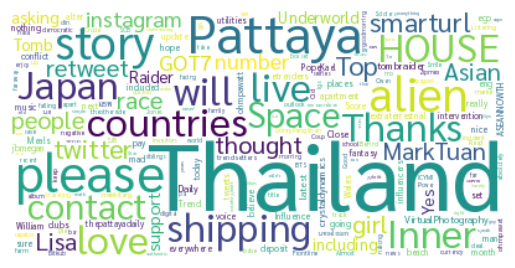

In [ ]:
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# ฟังก์ชันสำหรับลบคำที่มีตัวอักษรเดียวและลบเครื่องหมาย ' * #
def remove_single_char_words(text):
    return re.sub(r"\b\w{1}\b|['*#]", '', text).strip()

# สร้างรายการคำหยุด (stopwords) และเพิ่มคำที่ไม่ต้องการลงไป
my_stopwords = set(STOPWORDS)
my_stopwords.update(['https', 'Lek', 'di', 'IQid', 'Kalo'])

# กรองคำที่มีตัวอักษรเดียว, เครื่องหมาย ' * และ # ออกจากเนื้อหา
cleaned_contents = remove_single_char_words(contents)

# ตั้งค่าฟอนต์ที่รองรับภาษาไทย
font_path = '/usr/share/fonts/truetype/Sarabun-Regular.ttf'  # ปรับให้ตรงกับที่อยู่ฟอนต์ของคุณ

# สร้าง Word Cloud โดยใช้ฟอนต์ภาษาไทย
wordcloud = WordCloud(stopwords=my_stopwords, font_path=font_path, background_color="white").generate(cleaned_contents)

# แสดงภาพ Word Cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



---



## Problem 2: Study Collected Yelp Reviews

![](https://techcrunch.com/wp-content/uploads/2022/08/Yelp-Android_Full-Experience.jpg?w=1390&crop=1)

ดาวน์โหลด Yelp dataset เกี่ยวกับรีวิวของผู้ใช้บริการธุรกิจต่าง ๆ จาก https://www.yelp.com/dataset
<br>
รายละเอียดข้อมูล https://www.yelp.com/dataset/documentation/main
<br>
ให้ศึกษาข้อมูลจากไฟล์ yelp_academic_dataset_review.json, yelp_academic_dataset_business.json, และ yelp_academic_dataset_user.json

### อ่านข้อมูล Reviews, Businesses, และ Users เป็นจำนวน 100,000 รีวิว

In [ ]:
# เปลี่ยน path ของ working directory เช่น ที่ไหนใน Google Drive
myDirectory = "/content/drive/MyDrive/textdata/"
reviewFilePath = "yelp_academic_dataset_review.json"
businessFilePath = "yelp_academic_dataset_business.json"
userFilePath = "yelp_academic_dataset_user.json"

อ่านข้อมูล review

In [ ]:
# We only use the first 100,000 reviews
n = 100000
reviews = []
with open(myDirectory+reviewFilePath) as fl:
    for i, line in enumerate(fl):
        reviews.append(json.loads(line))
        if i+1 >= n:
            break
reviews = pd.DataFrame(reviews)
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    100000 non-null  object 
 1   user_id      100000 non-null  object 
 2   business_id  100000 non-null  object 
 3   stars        100000 non-null  float64
 4   useful       100000 non-null  int64  
 5   funny        100000 non-null  int64  
 6   cool         100000 non-null  int64  
 7   text         100000 non-null  object 
 8   date         100000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.9+ MB


อ่านข้อมูล business

In [ ]:
businesses = []
with open(myDirectory+businessFilePath) as fl:
    for i, line in enumerate(fl):
        businesses.append(json.loads(line))
businesses = pd.DataFrame(businesses)
businesses.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


อ่านข้อมูล user

In [ ]:
users = []
with open(myDirectory+userFilePath) as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
users = pd.DataFrame(users)
users.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [103]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


### รวมข้อมูล Reviews, Businesses, และ Users และสำรวจตัวแปรในข้อมูล

In [104]:
# join reviews and businesses data using inner join
df = pd.merge(reviews, businesses, on='business_id', suffixes=('_review', '_business'))
# join reviews-businesses and users data using inner join
df = pd.merge(df, users, on='user_id', suffixes=('_review_business', '_user'))
df

,review_id,user_id,business_id,stars_review,useful_review_business,funny_review_business,cool_review_business,text,date,name_review_business,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,...,0,0,0,0,0,0,1,1,0,0
1,PBIeDysdBxwY53IFnOPyUw,mh_-eMZ6K5RLWhZyISBhwA,d_tRshM-w6S4QxE4VVi8tQ,3.0,0,0,0,"Jones is definitely average quality, not many ...",2017-03-05 14:26:14,Jones,...,0,0,0,0,0,0,1,1,0,0
2,VJxlBnJmCDIy8DFG0kjSow,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,2.0,0,0,0,This is the second time we tried turning point...,2017-05-13 17:06:55,Turning Point of North Wales,...,0,0,0,0,0,0,0,0,0,0
3,S6pQZQocMB1WHMjTRbt77A,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,4.0,2,0,1,The place is cute and the staff was very frien...,2017-08-08 00:58:18,Turning Point of North Wales,...,0,0,0,0,1,1,0,0,1,4
4,7iReVDHvucme_cHIHYqmvg,ejFxLGqQcWNLdNByJlIhnQ,0mijbNf-7wiKJ9xto1pAyg,5.0,1,1,1,Best meal in a while! Chef Jen Carroll's new r...,2018-09-29 08:49:24,Spice Finch,...,0,0,0,0,1,1,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1BVRCPMy8sFLsWqRhBMA6Q,_h3ku94dHfDMlSrvYAwjjw,fPIcpUdc-2Sh2GIs3U07AA,5.0,1,0,0,Came in here and Bought the Resort Series Mona...,2014-08-15 01:29:45,Four Seasons Spa and Pool,...,0,0,0,0,0,0,0,0,0,0
99996,EftiL50cJdnZF5IH3bOPXg,lfGCCQWdxjhNstsE0w1AZQ,DCDngTtKm7ZAOLPvbX0_9g,5.0,0,0,0,Ali and his team always get the job done right...,2017-10-17 11:34:44,American Auto Repair & Getty,...,0,0,0,0,0,0,0,0,0,0
99997,RPWdAWWNlfbAvsDSWWvcfw,haqCShLJpKwjwW8xvw2Rgw,ckz5dDRKVRIX3bdI8KuMzQ,5.0,0,0,0,We rented a table and pirogue for a crawfish b...,2018-04-06 13:39:33,Chaps Party Rental,...,0,0,0,0,0,0,0,0,0,0
99998,e2Qovy06cMXwjRVmgqLI2A,dkMWfuUoXHM1wh-dPZoKHQ,t4sNPmBlDoYwJQD4CnW72Q,5.0,0,0,0,The best pizza I have ever had hands down my f...,2016-04-02 02:59:32,Versato's Pizza,...,0,0,0,0,0,0,0,0,0,0


### ทำการสำรวจข้อมูลเบื้องต้น

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   review_id                     100000 non-null  object 
 1   user_id                       100000 non-null  object 
 2   business_id                   100000 non-null  object 
 3   stars_review                  100000 non-null  float64
 4   useful_review_business        100000 non-null  int64  
 5   funny_review_business         100000 non-null  int64  
 6   cool_review_business          100000 non-null  int64  
 7   text                          100000 non-null  object 
 8   date                          100000 non-null  object 
 9   name_review_business          100000 non-null  object 
 10  address                       100000 non-null  object 
 11  city                          100000 non-null  object 
 12  state                         100000 non-null

สำรวจการแจกแจงของจำนวนรีวิวที่แต่ละ user ให้

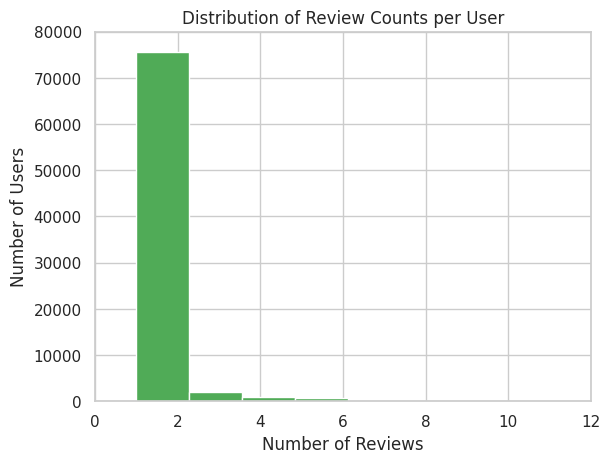

In [106]:
user_review_counts = df.groupby('user_id')['review_id'].count()
fig, ax = plt.subplots()
ax.hist(user_review_counts, bins=50,color='#50ab57')
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Number of Users')
ax.set_title('Distribution of Review Counts per User')
ax.set_ylim(0, 80000)
ax.set_xlim(0, 12)
plt.show()

สำรวจการแจกแจงของจำนวนรีวิวและจำนวนดาวที่แต่ละ business ได้รับ

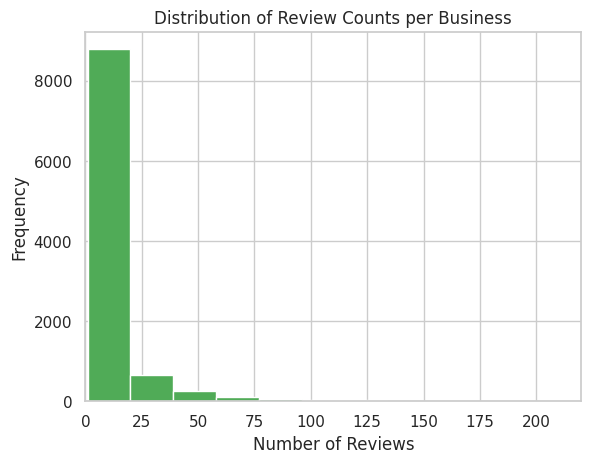

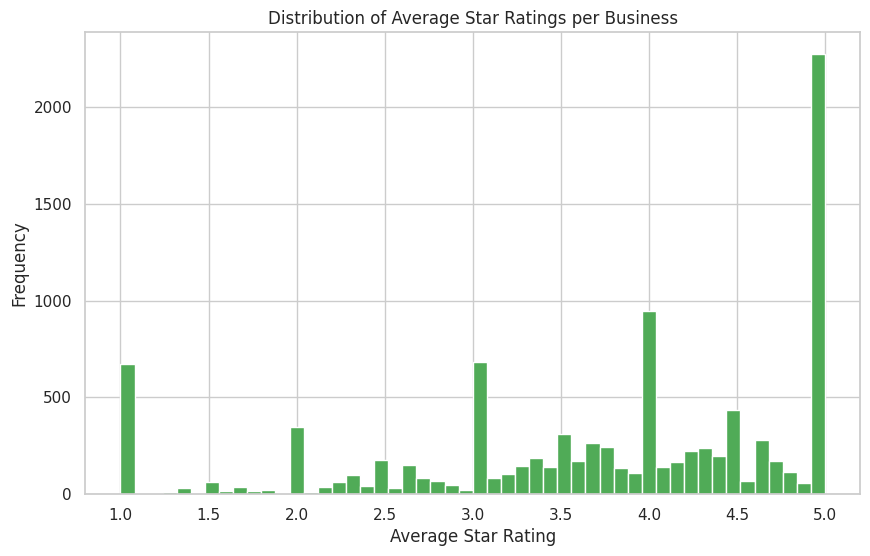

In [107]:
business_review_counts = df.groupby('business_id')['review_id'].count()
business_avg_stars = df.groupby('business_id')['stars_review'].mean()

# You can also create histograms for each variable separately
fig, ax = plt.subplots()
plt.hist(business_review_counts, bins=50,color='#50ab57')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of Review Counts per Business')
ax.set_xlim(0, 220)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(business_avg_stars, bins=50,color='#50ab57')
plt.xlabel('Average Star Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Star Ratings per Business')
plt.show()


มีธุรกิจกี่แบบ และธุรกิจในแต่ละแบบมีจำนวนเท่าไหร่

* ลองแยก `categories` ออกเป็น category ย่อย แล้วสามารถนับหรือใช้ฟังก์ชัน Counter `from collections import Counter` ในการนับจำนวนหรือความถี่ของธุรกิจแต่ละแบบ \
ตัวอย่าง https://www.geeksforgeeks.org/counters-in-python-set-1/

In [108]:
from collections import Counter

# Create an empty list to store all categories
all_categories = []

# Iterate through the 'categories' column of the 'businesses' DataFrame
for categories in businesses['categories']:
  if isinstance(categories, str):  # Check if categories is a string
    # Split the string by comma and append each category to the list
    for category in categories.split(', '):
      all_categories.append(category)

# Use Counter to count the frequency of each category
category_counts = Counter(all_categories)

# Print the category counts
print(category_counts)

# You can also convert it to a DataFrame for better visualization
category_df = pd.DataFrame.from_dict(category_counts, orient='index', columns=['Count'])
category_df = category_df.sort_values('Count', ascending=False)
category_df


Counter({'Restaurants': 52268, 'Food': 27781, 'Shopping': 24395, 'Home Services': 14356, 'Beauty & Spas': 14292, 'Nightlife': 12281, 'Health & Medical': 11890, 'Local Services': 11198, 'Bars': 11065, 'Automotive': 10773, 'Event Planning & Services': 9895, 'Sandwiches': 8366, 'American (Traditional)': 8139, 'Active Life': 7687, 'Pizza': 7093, 'Coffee & Tea': 6703, 'Fast Food': 6472, 'Breakfast & Brunch': 6239, 'American (New)': 6097, 'Hotels & Travel': 5857, 'Home & Garden': 5799, 'Fashion': 5739, 'Burgers': 5636, 'Arts & Entertainment': 5434, 'Auto Repair': 5433, 'Hair Salons': 5046, 'Nail Salons': 4621, 'Mexican': 4600, 'Italian': 4573, 'Specialty Food': 4233, 'Doctors': 3763, 'Pets': 3758, 'Real Estate': 3577, 'Seafood': 3539, 'Fitness & Instruction': 3293, 'Professional Services': 3270, 'Hair Removal': 3239, 'Desserts': 3186, 'Chinese': 3169, 'Bakeries': 3150, 'Grocery': 3139, 'Salad': 3064, 'Hotels': 2977, 'Chicken Wings': 2966, 'Cafes': 2756, 'Ice Cream & Frozen Yogurt': 2657, 'Ca

,Count
Restaurants,52268
Food,27781
Shopping,24395
Home Services,14356
Beauty & Spas,14292
...,...
Beach Bars,1
DUI Schools,1
Patent Law,1
Housing Cooperatives,1


### ให้ตั้งปัญหาหรือคำถาม และวิเคราะห์ข้อมูลเพื่อตอบคำถามดังกล่าว

<ระบุจุดประสงค์ของการศึกษา>

เพื่อศึกษาว่าธุรกิจ Nail Salons ร้านไหนดีที่สุดในเเต่ละรัฐ

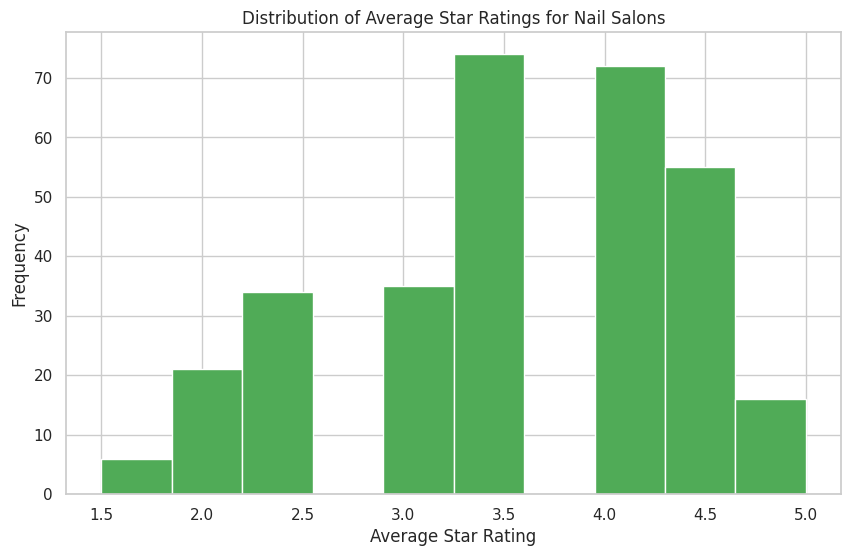

In [109]:
# Filter businesses that are Nail Salons
nail_salons = df[df['categories'].str.contains('Nail Salons', na=False)]

# Group by business and calculate the average star rating
avg_stars_nail_salons = nail_salons.groupby('business_id')['stars_business'].mean()

# Create a histogram of the average star ratings
plt.figure(figsize=(10, 6))
plt.hist(avg_stars_nail_salons, bins=10,color='#50ab57')
plt.xlabel('Average Star Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Star Ratings for Nail Salons')
plt.show()

In [110]:
import pandas as pd
import plotly.express as px

# Assuming nail_salons is your original DataFrame

# Step 1: Find the maximum stars_business for each state
max_stars_per_state = nail_salons.groupby('state')['stars_business'].max().reset_index()
max_stars_per_state.columns = ['State', 'Max Stars']

# Step 2: Merge to get business_id and name_review_business with the maximum stars_business
top_businesses = pd.merge(nail_salons, max_stars_per_state, left_on=['state', 'stars_business'], right_on=['State', 'Max Stars'])

# Select the desired columns
top_businesses = top_businesses[['business_id', 'name_review_business', 'state', 'stars_business','text']]
top_businesses.columns = ['Business ID', 'Business Name', 'State', 'Stars Business','text']

# Remove duplicates based on business_id
unique_top_businesses = top_businesses.drop_duplicates(subset='Business ID')

# Step 3: Create the sunburst chart
fig = px.sunburst(
    unique_top_businesses,
    path=['State', 'Business Name'],
    values='Stars Business',
    title='Top Rated Nail Salons by State'
)

# Show the chart
fig.show()

In [111]:
import pandas as pd

# Assuming top_businesses is your DataFrame with 'Business ID', 'Business Name', and 'text' columns

# Loop through unique business IDs
for business_id in top_businesses['Business ID'].unique():
    business_info = top_businesses[top_businesses['Business ID'] == business_id].iloc[0]  # Get the first occurrence of the business info
    business_name = business_info['Business Name']
    business_reviews = top_businesses[top_businesses['Business ID'] == business_id]['text'].head(5)  # Get the first 5 text reviews for the current business ID

    print(f"Business ID: {business_id}")
    print(f"Business Name: {business_name}")
    for review in business_reviews:
        print(f"Review: {review}")
    print("-" * 80)  # Adjust line length as needed for better separation

Business ID: curw--Uj4rIWSRq69J_j8Q
Business Name: Mrs.Ken Wax and Nail
Review: By far the best waxing service i have ever gotten IN MY LIFE. She is sweet, takes her time, and is gentle for first time clients.  She gives discounts for first time clients and students.  

i love her!
Review: Mrs. Ken not only did a great job waxing my brows, but was transparent and consultative too. Before she started waxing she asked me to hold up a mirror, showed me where I had over-tweezed, and advised that I let them grow out. She then showed me exactly where she was going to wax. The waxing itself was much less painful than I had experienced before, and, dare I say, relaxing? Afterwards, she asked me to hold up the mirror again, showed me what she did, and advised me once again to let certain areas grow out for a month before revisiting.

Mrs. Ken is warm, professional, and great at her craft. I am so glad I found her and will only let her touch my brows for as long as I live in the area.
Review: Wh

## Problem 3: Retrieving Data from Internet

ให้แต่ละกลุ่มคิดหัวข้อที่สนใจ และทำการดึงข้อมูลเกี่ยวกับหัวข้อที่สนใจผ่าน url ด้วยฟังก์ชัน `urllib.request.urlopen` จากแหล่งข้อมูลออนไลน์อย่างน้อย 10 แห่ง รวบรวมข้อมูลให้เป็นหนึ่งเดียว

In [ ]:
import urllib.request
from bs4 import BeautifulSoup
import ssl

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

def scrape_url(url):
    try:
        html = urllib.request.urlopen(url, context=ctx).read()
        soup = BeautifulSoup(html, 'html.parser')
        # ดึงข้อความจาก tag p ทั้งหมด (ปรับแต่งตามความเหมาะสมกับเว็บไซต์ที่ต้องการดึงข้อมูล)
        paragraphs = soup.find_all('p')
        text = ' '.join([p.get_text() for p in paragraphs])
        return text
    except Exception as e:
        print(f"Error scraping {url}: {e}")
        return ""

# รายการ URL ที่ต้องการดึงข้อมูล (ให้แทนที่ด้วย URL จริงที่เกี่ยวข้องกับหัวข้อที่สนใจ)
urls = [
    "https://en.wikipedia.org/wiki/Spider_lily",
    "https://en.wikipedia.org/wiki/Lily_of_the_valley",
    "https://en.wikipedia.org/wiki/Lilium",
    "https://www.flowerstationdubai.com/blogs/news/lily-flowers-colors-symbolism?srsltid=AfmBOoqRe99gnErn_LCWdE0yl6rwAy_35Mu58wLGTeNaJb6kA1rN1zKJ",
    "https://en.wikipedia.org/wiki/Lilium_henryi",
    "https://www.realsimple.com/different-types-of-lilies-8651198",
    "https://en.wikipedia.org/wiki/List_of_plants_known_as_lily",
    "https://en.wikipedia.org/wiki/Lily_(name)",
    "https://grace.ae/blogs/articles/lily-flower-meaning-and-symbolism?srsltid=AfmBOoozdNLOdYctcVjJlMNnc-qdalFlJ2JAvwa9nMtIRUEoftJR9cYS",
    "https://www.floraly.com.au/blogs/news/lily-flower-meanings?srsltid=AfmBOoo5WabInNUy67PEZpK2JvcuhUXT-G0r9bfD_6Tz-9VvgyWqD9z_"
]

# ดึงข้อมูลจากทุก URL
all_data = []
for url in urls:
    data = scrape_url(url)
    if data:
        all_data.append(data)

# รวมข้อมูลทั้งหมด
combined_data = ' '.join(all_data)

# บันทึกข้อมูลลงไฟล์
with open('scraped_data.txt', 'w', encoding='utf-8') as f:
    f.write(combined_data)

print("Data scraping complete. Results saved to scraped_data.txt")

Data scraping complete. Results saved to scraped_data.txt


In [ ]:
combined_data

'Spider lily is the common name for a number of different plant species within the subfamily Amaryllidoideae which belong to the following genera:\n \n Lily of the valley (Convallaria majalis /ˌkɒnvəˈlɛəriə məˈdʒeɪlɪs/),[2] sometimes written lily-of-the-valley,[3] is a woodland flowering plant with sweetly scented, pendent, bell-shaped white flowers borne in sprays in spring. It is native throughout the cool temperate Northern Hemisphere in Asia and Europe.[4][5] Convallaria majalis var. montana, also known as the American lily of the valley, is native to North America.[6][7]\n Due to the concentration of cardiac glycosides (cardenolides), it is highly poisonous if consumed by humans or other animals.[8][9]\n Other names include May bells, Our Lady\'s tears, and Mary\'s tears. Its French name, muguet, sometimes appears in the names of perfumes imitating the flower\'s scent. In pre-modern England, the plant was known as glovewort (as it was a wort used to create a salve for sore hands),

เตรียมข้อมูลและทำความสะอาดข้อมูลด้วยการทำ lower case, tokenization, removing stopwords (as well as punctuations, unrelated symbols, etc.), stemming, lemmatization เป็นต้น

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and unrelated symbols
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    # Add additional stopwords
    additional_stopwords = {'use', 'name', 'also', 'includ'}
    stop_words.update(additional_stopwords)
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

    return lemmatized_tokens

try:
    # Read the scraped data
    with open('scraped_data.txt', 'r', encoding='utf-8') as f:
        scraped_text = f.read()

    # Clean the text
    cleaned_tokens = clean_text(scraped_text)

    # Join the tokens back into a string
    cleaned_text = ' '.join(cleaned_tokens)

    # Save the cleaned text
    with open('cleaned_data.txt', 'w', encoding='utf-8') as f:
        f.write(cleaned_text)

    print("Text cleaning complete. Results saved to cleaned_data.txt")
except Exception as e:
    print(f"An error occurred: {e}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Text cleaning complete. Results saved to cleaned_data.txt


Text Mining: ทำการวิเคราะห์ข้อความที่รวบรวมมาได้ พร้อมทั้งแสดงการนำเสนอที่สร้างสรรค์

In [ ]:
cleaned_text

'spider lili common number differ plant speci within subfamili amaryllidoidea belong follow genus lili valley convallaria majali ˌkɒnvəˈlɛəriə məˈdʒeɪlɪs2 sometim written lilyofthevalley3 woodland flower plant sweetli scent pendent bellshap white flower born spray spring nativ throughout cool temper northern hemispher asia europe45 convallaria majali var montana known american lili valley nativ north america67 due concentr cardiac glycosid cardenolid highli poison consum human animals89 name includ may bell ladi tear mari tear french muguet sometim appear name perfum imit flower scent premodern england plant known glovewort wort use creat salv sore hand apollinari accord legend discov apollo10 convallaria majali herbac perenni plant often form extens coloni spread underground stem call rhizom new upright shoot form end stolon summer11 upright dormant stem often call pips12 grow spring new leafi shoot still remain connect shoot ground stem grow 1530 cm 612 tall one two leav 1025 cm 410 

In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer

# ใช้ CountVectorizer สร้าง bigram
vectorizer = CountVectorizer(ngram_range=(2, 2))  # เปลี่ยนเป็น (3, 3) หากต้องการ trigram
X = vectorizer.fit_transform([cleaned_text])
bigram_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False).head(10)

# แปลงข้อมูลให้เหมาะกับ Plotly
bigram_freq_df = pd.DataFrame({'Bigram': bigram_freq.index, 'Frequency': bigram_freq.values})

# สร้างกราฟ interactive ด้วย Plotly
fig = px.bar(bigram_freq_df, x='Bigram', y='Frequency', title='Top 10 Most Frequent Bigrams',
             labels={'Bigram': 'Bigrams', 'Frequency': 'Frequency'},
             color='Frequency', color_continuous_scale='viridis')

# ตั้งค่าการแสดงผล
fig.update_layout(xaxis_tickangle=-45)

# แสดงกราฟ
fig.show()


convarllaria majali = lily of the valley

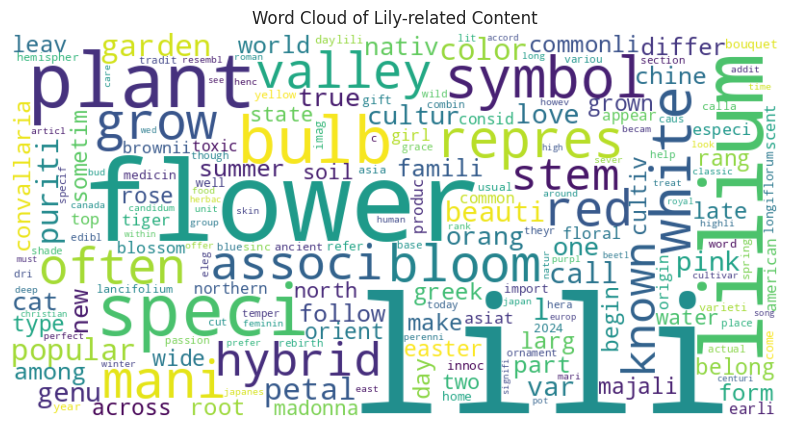

In [ ]:
# อ่านข้อมูลที่ทำความสะอาดแล้ว
with open('cleaned_data.txt', 'r', encoding='utf-8') as f:
    cleaned_text = f.read()

# แยกคำ
words = cleaned_text.split()

# สร้างรายการคำหยุด (stopwords) และเพิ่มคำที่ไม่ต้องการลงไป
stop_words = list(set(stopwords.words('english')).union({'use', 'name', 'also', 'includ','may','like','need','know','mean','list'}))

# ลบคำหยุดออกจากรายการคำ
filtered_words = [word for word in words if word not in stop_words]

# นับความถี่ของคำ
word_freq = Counter(filtered_words)

# สร้าง Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# แสดง Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Lily-related Content')
plt.savefig('wordcloud.png')
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px
from nltk.corpus import stopwords

# Ensure you have the stopwords resource (if not, uncomment the following two lines)
# import nltk
# nltk.download('stopwords')

# TF-IDF Vectorizer setup to exclude common stopwords
stop_words = list(set(stopwords.words('english')).union({'use', 'name', 'also', 'includ','may','like','need','know','mean','list','mani','repres'}))
vectorizer = TfidfVectorizer(stop_words=stop_words)
tfidf_matrix = vectorizer.fit_transform([cleaned_text])

# Get feature names and their TF-IDF scores
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()[0]
word_tfidf_scores = list(zip(feature_names, tfidf_scores))

# Sort and select top words (already sorted in reverse order by score)
word_tfidf_scores.sort(key=lambda x: x[1], reverse=True)
top_words = word_tfidf_scores[:10]

# Prepare data for interactive plot
words = [word for word, score in top_words]
scores = [round(score, 2) for word, score in top_words]  # Round to 2 decimal places

# Create a DataFrame for Plotly Express
df = pd.DataFrame({'Words': words, 'TF-IDF Score': scores})

# Create interactive bubble chart
fig = px.scatter(df, x='Words', y='TF-IDF Score', size='TF-IDF Score',
                 text='Words', title='Top 10 Important Words (TF-IDF)',
                 size_max=60, color='TF-IDF Score', color_continuous_scale=px.colors.sequential.Viridis)

# Update the layout
fig.update_traces(textposition='top center')
fig.update_layout(xaxis_title='Words', yaxis_title='TF-IDF Score')

# Display chart
fig.show()

ใช้TF-IDF เพราะต้องการวัดว่าคำใดมีความสำคัญในเอกสารมากที่สุด (ในแง่ความถี่ที่ไม่ซับซ้อน) ไม่ได้เน้นไปที่การจับความหมายหรือความสัมพันธ์ระหว่างคำเลยไม่ได้ใช้ word2vec

In [ ]:
# Import the cosine_similarity function
from sklearn.metrics.pairwise import cosine_similarity

# Create a list to store the cleaned text from each URL
cleaned_texts = []
for url in urls:
    try:
        # Scrape the URL
        data = scrape_url(url)

        # Clean the text
        cleaned_tokens = clean_text(data)
        cleaned_text = ' '.join(cleaned_tokens)

        # Add the cleaned text to the list
        cleaned_texts.append(cleaned_text)
    except Exception as e:
        print(f"Error processing {url}: {e}")

# TF-IDF Vectorizer setup to exclude common stopwords
stop_words = list(set(stopwords.words('english')).union({'use', 'name', 'also', 'includ'}))
vectorizer = TfidfVectorizer(stop_words=stop_words)
tfidf_matrix = vectorizer.fit_transform(cleaned_texts)

# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix)

# Create a DataFrame for better visualization
# Shorten the URL names for better readability and avoid duplicates
short_names = [
    "Wiki_Spider_Lily",
    "Wiki_Lily_of_the_Valley",
    "Wiki_Lilium",
    "FlowerStation_Lily_Colors",
    "Wiki_Lilium_henryi",
    "RealSimple_Lily_Types",
    "Wiki_Lily_Plants",
    "Wiki_Lily_Name",
    "Grace_Lily_Meaning",
    "Floraly_Lily_Meanings"
]

similarity_df = pd.DataFrame(cosine_sim,
                             columns=short_names,
                             index=short_names)

# Display the similarity matrix
print(similarity_df)


                           Wiki_Spider_Lily  Wiki_Lily_of_the_Valley  \
Wiki_Spider_Lily                   1.000000                 0.080468   
Wiki_Lily_of_the_Valley            0.080468                 1.000000   
Wiki_Lilium                        0.191356                 0.300296   
FlowerStation_Lily_Colors          0.107283                 0.241098   
Wiki_Lilium_henryi                 0.069279                 0.155052   
RealSimple_Lily_Types              0.082001                 0.203967   
Wiki_Lily_Plants                   0.148390                 0.181574   
Wiki_Lily_Name                     0.016857                 0.060697   
Grace_Lily_Meaning                 0.137924                 0.253436   
Floraly_Lily_Meanings              0.136790                 0.280922   

                           Wiki_Lilium  FlowerStation_Lily_Colors  \
Wiki_Spider_Lily              0.191356                   0.107283   
Wiki_Lily_of_the_Valley       0.300296                   0.241098   


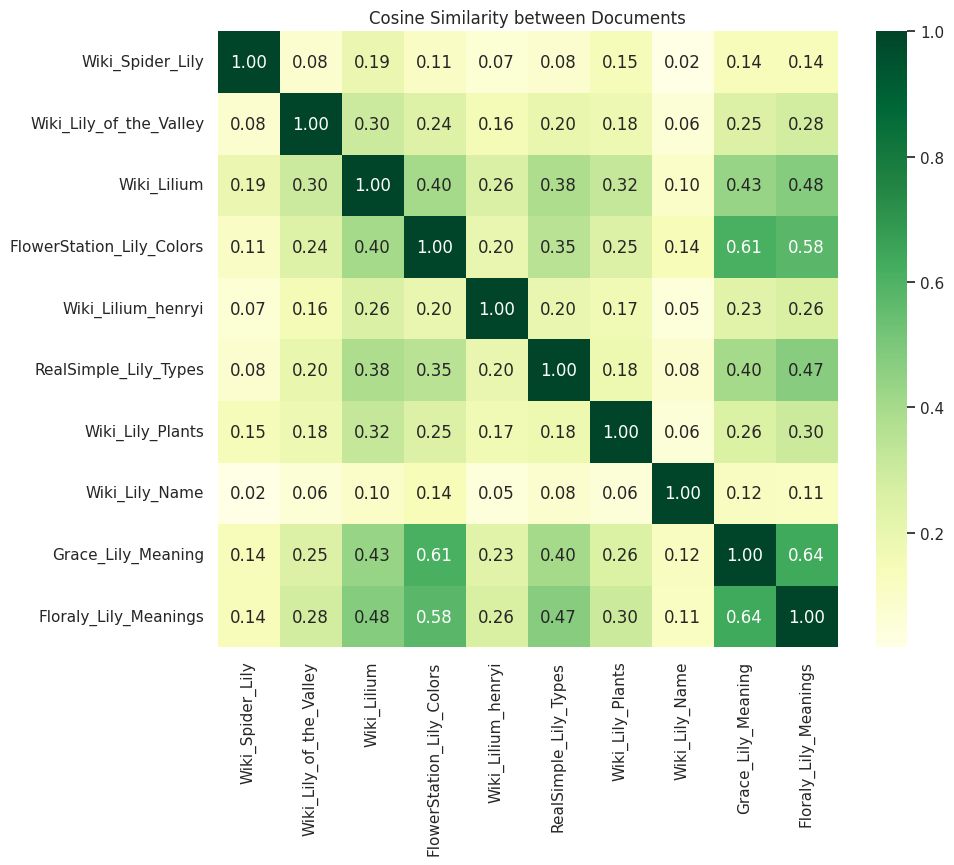

In [ ]:
import seaborn as sns
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, annot=True, cmap='YlGn', fmt=".2f")
plt.title('Cosine Similarity between Documents')
plt.show()

-----------------
# เสร็จแล้ววววว 🥳

สิ่งที่ต้องแนบส่ง:
* Notebook File (ตัวอย่าง "filename.ipynb") หรือ Link to Google Colab ซึ่งมีผลลัพธ์จากการรันโค้ดแสดงทั้งหมด
* Slides สำหรับการนำเสนอ **10** นาที ซึ่งประกอบไปด้วย
    * ตอบคำถามต่าง ๆ ใน Notebook
    * อธิบายวิธีการที่ใช้ และแสดง screenshots ของผลลัพธ์ที่ได้จาก Python Notebook โดยแสดงภาพและตาราง โดยไม่จำเป็นที่จะต้องนำเสนอ source code

** Note: แต่ละกลุ่มส่งแค่ครั้งเดียว **